## Predicting credit card defaults 
- Predicting how default payments vary by different demographic varibles
- Dataset: UCI Machine Learning Repository
- Link to Dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients# 

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
# import data
df= pd.read_excel("default_credit_card_clients.xls",skiprows=1)

In [4]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


** Data Dictionary **
- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- Gender (1 = male; 2 = female). 
- Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- Marital status (1 = married; 2 = single; 3 = others). 
- Age (year). 
- PAY_0 to PAY_6 History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:   PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005.  
-  The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

- BILL_AMT1 to BILL_AMT6 : Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005. 
- PAY_AMT1 to PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005. 

**Target Variable** This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.

## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
#Check for null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
# Renaming column name to a shorter name
df = df.rename(columns={'default payment next month': 'default'})

In [8]:
# Categorial variables are listed as numeric due to the nature of the data. Changing data type
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['default1'] = df['default'].astype('category')
df['PAY_0'] = df['PAY_0'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')

In [9]:
# Replacing numbers for names for categorical variables. For easier understanding of visuals
df['SEX'].replace([1,2],['Male','Female'],inplace=True)

# 5,6 are not known and can be placed in other
df['EDUCATION'].replace([1,2,3,4,0,5,6],['graduate school','university', 'high school', 'others','others','others','others'],inplace=True)

# 0 are not known and can be placed in other
df['MARRIAGE'].replace([1,2,3,0],['married','single','others','others'],inplace=True)

df['default1'].replace([1,0],['Yes','No'],inplace=True)

# Pay_0 to Pay_6 has -1 and -2 as unknown variables. Assuming they are duly paid so replacing with 0 
df['PAY_0'].replace([-1,-2],[0,0],inplace=True)
df['PAY_2'].replace([-1,-2],[0,0],inplace=True)
df['PAY_3'].replace([-1,-2],[0,0],inplace=True)
df['PAY_4'].replace([-1,-2],[0,0],inplace=True)
df['PAY_5'].replace([-1,-2],[0,0],inplace=True)
df['PAY_6'].replace([-1,-2],[0,0],inplace=True)

In [10]:
# Creating age bins
bins = [18, 25, 35, 45, 55, 65, 100]
df['age_bins']=pd.cut(df['AGE'], bins)

## Data Understanding

In [41]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Average age is 35 years and average credit amount is $167,484.322 

In [12]:
df.describe(include=['O','category'])

,SEX,EDUCATION,MARRIAGE,default1,age_bins
count,30000,30000,30000,30000,30000
unique,2,4,3,2,6
top,Female,university,single,No,"(25, 35]"
freq,18112,14030,15964,23364,12938


- Over 50% of the clients are females. 
- Majority clients have university degree
- Over 50% of the clients are single
- Over 75% of the clients made six months payment (atleast min amount due) on time 

In [42]:
df.corr()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,1.000000,0.026179,0.018678,-0.020978,-0.010001,-0.018820,0.013700,-0.020336,-0.032450,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.144713,-0.170745,-0.197136,-0.191323,-0.180629,-0.170045,-0.167820,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
AGE,0.018678,0.144713,1.000000,-0.001447,-0.008774,-0.014266,-0.007288,-0.013277,-0.016948,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.020978,-0.170745,-0.001447,1.000000,0.698389,0.516970,0.460224,0.424473,0.373805,-0.000819,0.009137,0.013307,0.022100,0.030731,0.030201,-0.079177,-0.057189,-0.062620,-0.061886,-0.053784,-0.048733,0.396019
PAY_2,-0.010001,-0.197136,-0.008774,0.698389,1.000000,0.663529,0.512773,0.462717,0.407086,0.011684,0.015932,0.022950,0.032467,0.040422,0.042222,-0.097475,-0.054838,-0.059865,-0.053981,-0.048714,-0.043099,0.327093
PAY_3,-0.018820,-0.191323,-0.014266,0.516970,0.663529,1.000000,0.678931,0.551430,0.492827,-0.020586,-0.000968,0.002447,0.016579,0.026196,0.028979,-0.039356,-0.073670,-0.057702,-0.053849,-0.050805,-0.048443,0.286999
PAY_4,0.013700,-0.180629,-0.007288,0.460224,0.512773,0.678931,1.000000,0.745419,0.602875,-0.025184,-0.012569,0.002670,0.014654,0.027239,0.033138,-0.054484,-0.036877,-0.074064,-0.055305,-0.052732,-0.048828,0.269055
PAY_5,-0.020336,-0.170045,-0.013277,0.424473,0.462717,0.551430,0.745419,1.000000,0.740357,-0.018581,-0.008614,0.003377,0.024139,0.036216,0.042616,-0.053692,-0.039586,-0.037270,-0.065943,-0.051815,-0.046110,0.260850
PAY_6,-0.032450,-0.167820,-0.016948,0.373805,0.407086,0.492827,0.602875,0.740357,1.000000,-0.019581,-0.009790,0.001691,0.020598,0.041785,0.046012,-0.047804,-0.039868,-0.040160,-0.030460,-0.066875,-0.045358,0.244437
BILL_AMT1,0.019389,0.285430,0.056239,-0.000819,0.011684,-0.020586,-0.025184,-0.018581,-0.019581,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644


- Correlation was insignificant in the dataset. This is surprising as Billed amount and payment amount should have some correlation. 
- Correlation was high for Bill Amounts. All Bill amounts were highly correlated to each other. This is expected as if only minimun balances are paid off then bill amounts will be similar each month 

In [13]:
df.groupby('default1').mean()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
default1,,,,,,,,,,,,,,,,,,,,,,
No,15064.893982,178099.726074,35.417266,0.196242,0.180277,0.183145,0.149632,0.121726,0.133368,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769,0.0
Yes,14773.781947,130109.656420,35.725738,0.921941,0.812086,0.729807,0.643008,0.572785,0.554702,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0


- Average Credit of clients who defaulted was $130,109

In [14]:
df.groupby('SEX').mean()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
SEX,,,,,,,,,,,,,,,,,,,,,,
Female,15130.282078,170086.462014,34.806868,0.335523,0.290967,0.277661,0.234265,0.199095,0.207984,49216.395263,47380.997736,45633.108989,42122.600099,39473.816807,38064.427286,5660.327076,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,0.207763
Male,14802.770104,163519.825034,36.519431,0.389132,0.364317,0.344297,0.296097,0.255636,0.254879,54281.004038,51918.541723,49115.727961,45000.331090,41587.504963,40101.775320,5668.537264,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,0.241672


- Females clients had ligher credit limit fo $ 170k  compared to 163k for males clients

In [15]:
df.groupby('EDUCATION').mean()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
EDUCATION,,,,,,,,,,,,,,,,,,,,,,
graduate school,14697.212187,212956.069910,34.231838,0.286726,0.229287,0.227303,0.188474,0.165801,0.180916,48825.437506,47219.101181,45781.689183,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842,0.192348
high school,15342.314013,126550.270490,40.299980,0.428513,0.399431,0.378686,0.326419,0.268863,0.258898,47563.546065,45520.299776,43440.916616,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034,0.251576
others,17557.254274,181316.239316,36.143162,0.202991,0.076923,0.044872,0.038462,0.021368,0.029915,72493.745726,66579.929487,62962.286325,53971.143162,46015.284188,40488.354701,6248.412393,8118.194444,8340.756410,4962.378205,5696.822650,7476.096154,0.070513
university,15024.237776,147062.437634,34.722096,0.389594,0.368781,0.344476,0.295438,0.253599,0.256237,53605.533999,51359.611404,48662.161582,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028,0.237349


In [16]:
df.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
MARRIAGE,,,,,,,,,,,,,,,,,,,,,,
married,15253.288821,182200.893184,40.016692,0.367596,0.328721,0.303097,0.262464,0.222857,0.224760,53258.129072,50925.088147,48981.229592,44891.819094,41975.121824,40250.686946,5789.741562,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,0.234717
others,14023.726790,103076.923077,42.084881,0.384615,0.326260,0.352785,0.297082,0.196286,0.244032,39913.753316,37744.968170,34640.151194,29479.514589,26758.103448,26897.198939,7037.175066,7137.039788,5846.119363,4797.901857,4214.509284,3241.315650,0.236074
single,14807.277813,156413.660737,31.452706,0.346843,0.312453,0.303746,0.254698,0.220935,0.227700,49749.414746,47955.188111,45621.441493,42194.771674,39207.970120,37974.720308,5523.197194,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,0.209283


In [17]:
df['default1'].value_counts(normalize=True) * 100

No     77.88
Yes    22.12
Name: default1, dtype: float64

In [18]:
df['default1'].value_counts()

No     23364
Yes     6636
Name: default1, dtype: int64

In [19]:
g = df.groupby('SEX')['default1']
SEX = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (SEX)

                 counts  percentage
SEX    default1                    
Female No         14349   79.223719
       Yes         3763   20.776281
Male   No          9015   75.832773
       Yes         2873   24.167227


- 20 % of the total females defaulted and 24% of males defaulted
- Males more likely to default next month


In [20]:
g = df.groupby('EDUCATION')['default1']
EDU = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (EDU)

                          counts  percentage
EDUCATION       default1                    
graduate school No          8549   80.765234
                Yes         2036   19.234766
high school     No          3680   74.842384
                Yes         1237   25.157616
others          No           435   92.948718
                Yes           33    7.051282
university      No         10700   76.265146
                Yes         3330   23.734854


- 25 % of clients with high school diploma defaulted
- 23.7% of clients with univeristy degree defaulted
- 19% of clients with grad school degree defaulted

In [21]:
g = df.groupby('MARRIAGE')['default1']
MAR = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (MAR)

                   counts  percentage
MARRIAGE default1                    
married  No         10453   76.528296
         Yes         3206   23.471704
others   No           288   76.392573
         Yes           89   23.607427
single   No         12623   79.071661
         Yes         3341   20.928339


- 23.6% of clients with Others as martial statues defaulted but they were less than 350 clients in this category
- 23.4% of married clients defaulted
- 20.9 % of single clients defaulted

In [44]:
g = df.groupby('MARRIAGE')['EDUCATION']
MAR = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (MAR)

                          counts  percentage
MARRIAGE EDUCATION                          
married  university         6842   50.091515
         graduate school    3722   27.249433
         high school        2861   20.945896
         others              234    1.713156
others   university          168   44.562334
         high school         147   38.992042
         graduate school      54   14.323607
         others                8    2.122016
single   university         7020   43.973941
         graduate school    6809   42.652217
         high school        1909   11.958156
         others              226    1.415685


- Most of the married couples had univerity or graduate school degree

In [45]:
g = df.groupby('MARRIAGE')['age_bins']
MAR = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (MAR)

                    counts  percentage
MARRIAGE age_bins                     
married  (35, 45]     5784   42.345706
         (25, 35]     3980   29.138297
         (45, 55]     2793   20.448056
         (55, 65]      588    4.304854
         (18, 25]      440    3.221319
         (65, 100]      74    0.541767
others   (35, 45]      136   36.074271
         (45, 55]      119   31.564987
         (25, 35]       77   20.424403
         (55, 65]       27    7.161804
         (18, 25]       18    4.774536
single   (25, 35]     8881   55.631421
         (18, 25]     3413   21.379354
         (35, 45]     2602   16.299173
         (45, 55]      913    5.719118
         (55, 65]      143    0.895765
         (65, 100]      12    0.075169


## Data Visualization

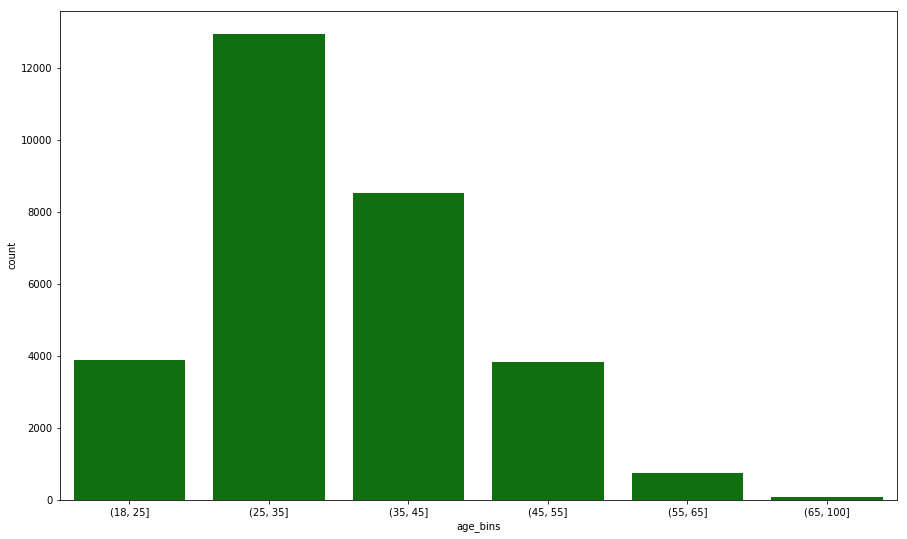

In [22]:
plt.subplots(figsize=(15,9))
sns.countplot(df.age_bins, color= 'G')
plt.show()

- Graph shows majority of the clients were in the age range of 25yrs to 45 yrs old.

In [23]:
df.LIMIT_BAL.hist(bins=25, figsize=(15,10) , color = 'g')

- Historgam shows most of the clients had a credit limit in the range of 100k to 200k 

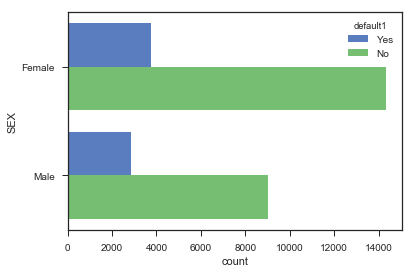

In [35]:
sns.set_palette("muted")
sns.countplot(y="SEX", hue="default1", data=df)
plt.show()

The plot shows more females defaulted

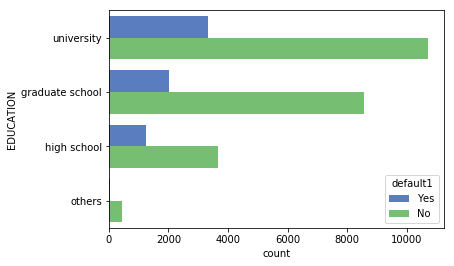

In [25]:
sns.set_palette("muted")
sns.countplot(y="EDUCATION", hue="default1", data=df)
plt.show()

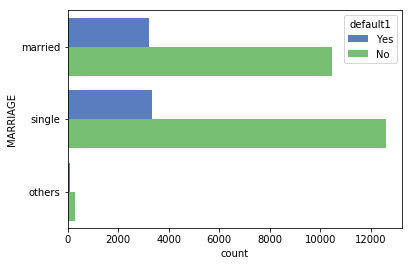

In [26]:
sns.set_palette("muted")
sns.countplot(y="MARRIAGE", hue="default1", data=df)
plt.show()

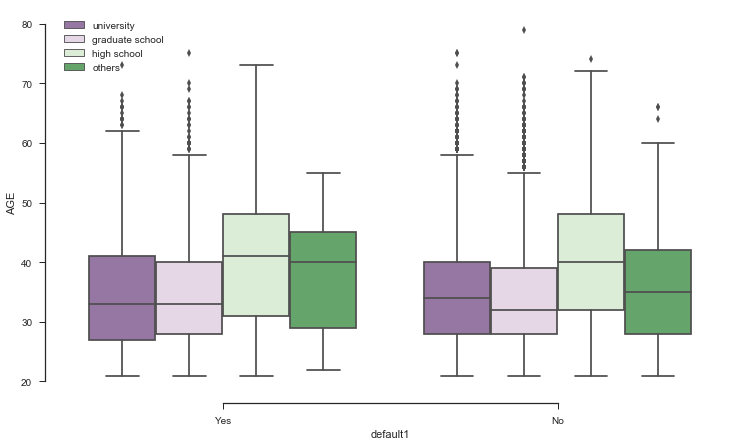

In [27]:
sns.set(style="ticks")
plt.subplots(figsize=(12,7))
sns.boxplot(x="default1", y="AGE", hue="EDUCATION", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.legend(loc='upper left')
plt.show()

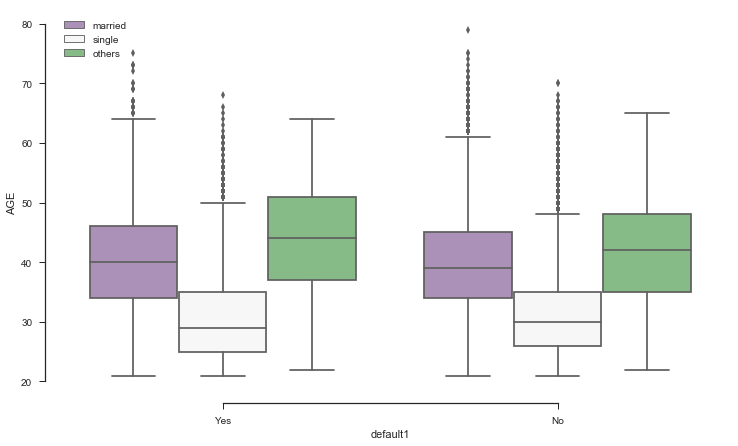

In [28]:
sns.set(style="ticks")
plt.subplots(figsize=(12,7))
sns.boxplot(x="default1", y="AGE", hue="MARRIAGE", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.legend(loc='upper left')
plt.show()

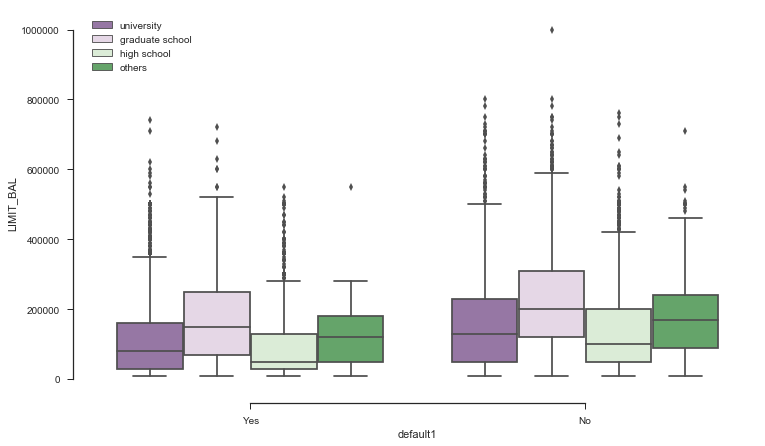

In [34]:
sns.set(style="ticks")
plt.subplots(figsize=(12,7))
sns.boxplot(x="default1", y="LIMIT_BAL", hue="EDUCATION", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.legend(loc='upper left')
plt.show()

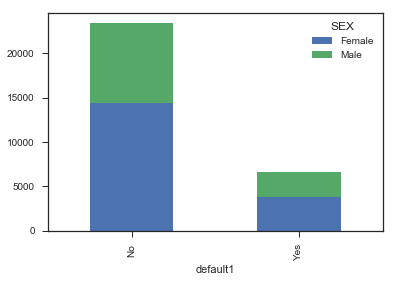

In [29]:
df.groupby(['default1', 'SEX']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

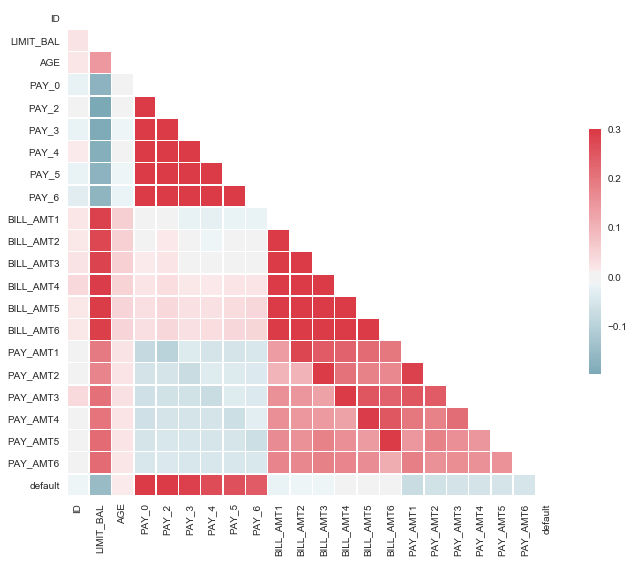

In [31]:
from string import ascii_letters
import matplotlib.pyplot as plt
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

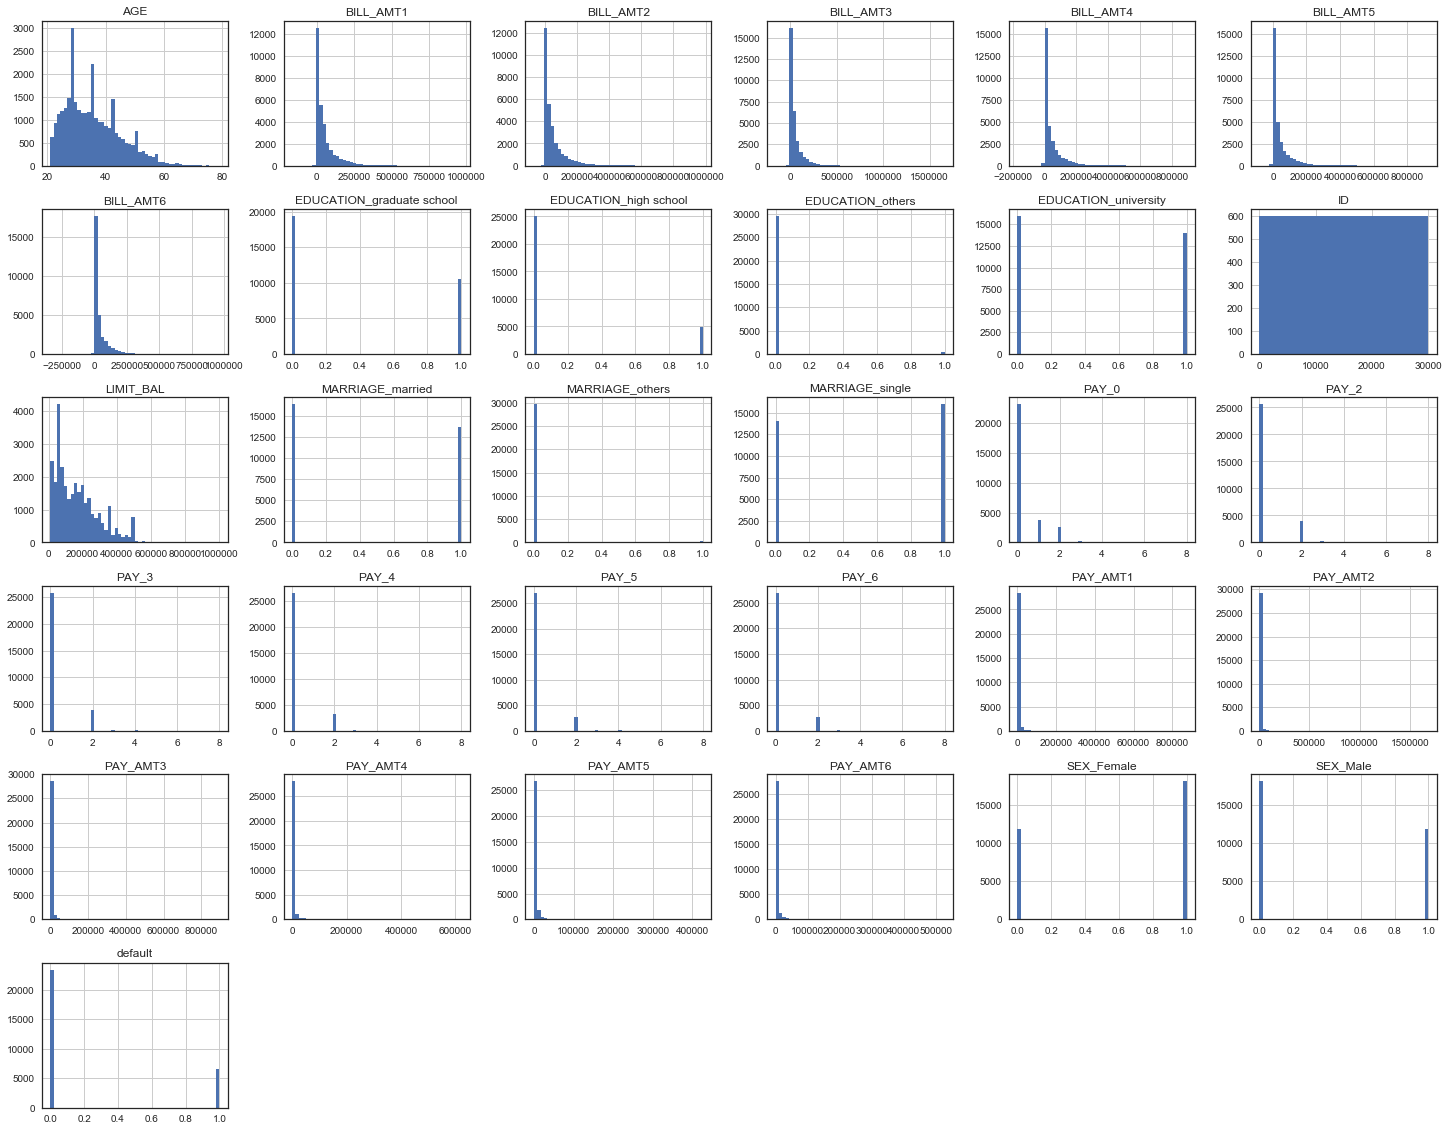

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(25,20))
plt.show()

## Prepare the data for Machine Learning algorithms

In [34]:
df.drop('default1', axis=1,inplace=True) 
df.drop('age_bins', axis=1,inplace=True) 

In [35]:
df=df=pd.get_dummies(df)

In [36]:
df.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,0,0,0,1,1,0,0
1,2,120000,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,0,0,1,0,0,1
2,3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,0,0,0,1,0,0,1
3,4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,0,0,0,1,1,0,0
4,5,50000,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,0,1,1,0,0


In [37]:
y = df.default
X = df.drop('default', axis=1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y, 
                                                    test_size=0.3)

In [39]:
X_train.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
26822,26823,120000,29,0,0,2,0,0,0,579,2718,1280,3783,2522,1261,3580,0,3822,0,0,1261,0,1,0,0,0,1,1,0,0
27565,27566,360000,57,1,0,0,0,0,0,0,0,860,246,-46,-46,0,860,246,0,0,0,0,1,1,0,0,0,1,0,0
15540,15541,260000,46,0,0,0,0,0,0,57963,262696,247462,252073,195628,199646,247562,9000,8300,6576,7000,7000,0,1,0,0,0,1,1,0,0
6317,6318,210000,35,0,0,0,0,0,0,128595,131627,136428,54058,55398,56698,4606,6815,1800,2000,2000,2000,0,1,0,0,0,1,1,0,0
7909,7910,50000,55,0,0,0,0,0,0,47860,47294,45136,29378,29750,30327,1936,3654,1038,1222,1217,946,1,0,0,1,0,0,0,0,1


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7787777777777778

In [42]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7304444444444445

In [43]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7631111111111111